In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np                  
import matplotlib.pyplot as plt                    # plots
import seaborn as sns                              # more plots
from dateutil.relativedelta import relativedelta   # working with dates with style
%matplotlib inline
from datetime import datetime, timedelta
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

In [2]:
data = pd.read_excel(r'C:\Users\u22v09\Desktop\Billing Data 2016 to July 2020.xlsx',skiprows=3)

In [3]:
data

,Customer Segment,Month,2016,2017,2018,2019,2020,Grand Total
0,DIR,Jan,80.867485,77.740950,104.021080,41.170140,306.175585,609.975240
1,NaN,Feb,173.982527,79.404745,165.949030,95.725120,219.884278,734.945700
2,NaN,March,159.529362,207.481385,131.805930,117.128542,111.507920,727.453139
3,NaN,April,96.101656,129.967310,103.114630,132.594930,0.000000,461.778526
4,NaN,May,105.910721,114.721740,132.691260,133.538310,93.440367,580.302398
...,...,...,...,...,...,...,...,...
56,NaN,Sep,53.417010,58.696649,56.496137,65.652423,NaN,234.262219
57,NaN,Oct,52.051859,58.591214,79.972150,61.446451,NaN,252.061675
58,NaN,Nov,39.181285,81.330690,54.775610,97.236324,NaN,272.523909
59,NaN,Dec,68.341527,80.893484,65.909737,69.605557,NaN,284.750305


In [4]:
# data[['Customer Segment']].bfill(axis = 0) 
data['Customer Segment ']= data['Customer Segment '].fillna(method = "ffill")

In [5]:
data=data[data['Customer Segment ']== 'DIR']

In [6]:
data.drop('Grand Total', axis = 1, inplace = True)
data=pd.melt(data, id_vars =['Month','Customer Segment '])
data=data.dropna()

In [7]:
df=data.copy()
df['Date'] =pd.to_datetime(df.variable.astype(str) + '/' + df.Month.astype(str) + '/01')
df.head()

,Month,Customer Segment,variable,value,Date
0,Jan,DIR,2016,80.867485,2016-01-01
1,Feb,DIR,2016,173.982527,2016-02-01
2,March,DIR,2016,159.529362,2016-03-01
3,April,DIR,2016,96.101656,2016-04-01
4,May,DIR,2016,105.910721,2016-05-01


In [8]:
df = df.sort_values('Date')
df = df.set_index('Date')

In [9]:
df.head()

,Month,Customer Segment,variable,value
Date,,,,
2016-01-01,Jan,DIR,2016,80.867485
2016-02-01,Feb,DIR,2016,173.982527
2016-03-01,March,DIR,2016,159.529362
2016-04-01,April,DIR,2016,96.101656
2016-05-01,May,DIR,2016,105.910721


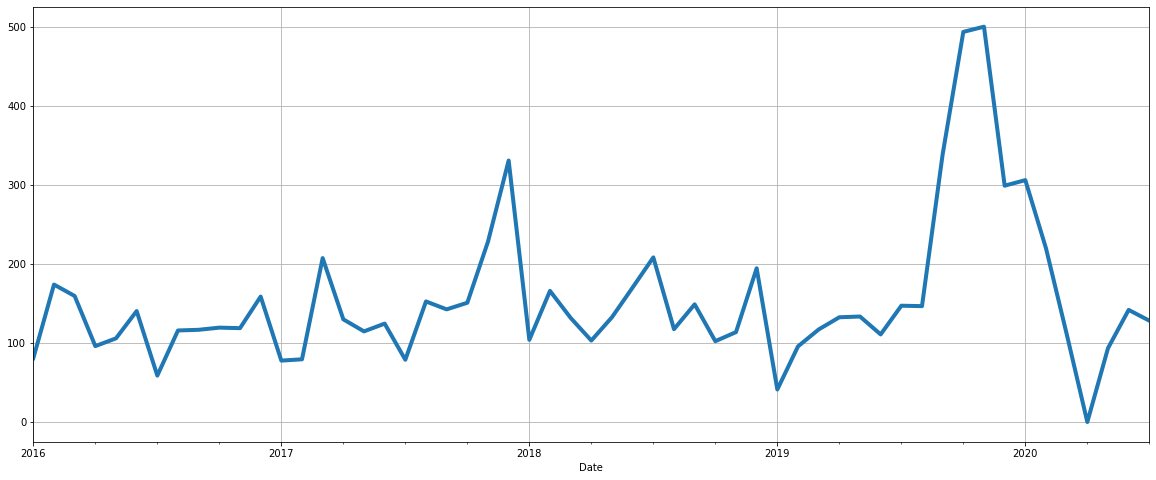

In [10]:
df=df.rename(columns={'value':'ASP'})
df['ASP'].plot(figsize = (20,8), lw = 4, grid = True)

# Augmented Dickey-Fuller Test

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

    - **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
    

### The more negative this ADF statistic, the more likely we are to reject the null hypothesis.

In [11]:
from statsmodels.tsa.stattools import adfuller
# df = df.replace([np.inf, -np.inf], np.nan)
# df=df.dropna()
result = adfuller(df['ASP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.396862
p-value: 0.011066
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
result_mul = seasonal_decompose(df['ASP'], model='additive', freq=1)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head(2)

,seas,trend,resid,actual_values
Date,,,,
2016-01-01,0.0,80.867485,0.0,80.867485
2016-02-01,0.0,173.982527,0.0,173.982527


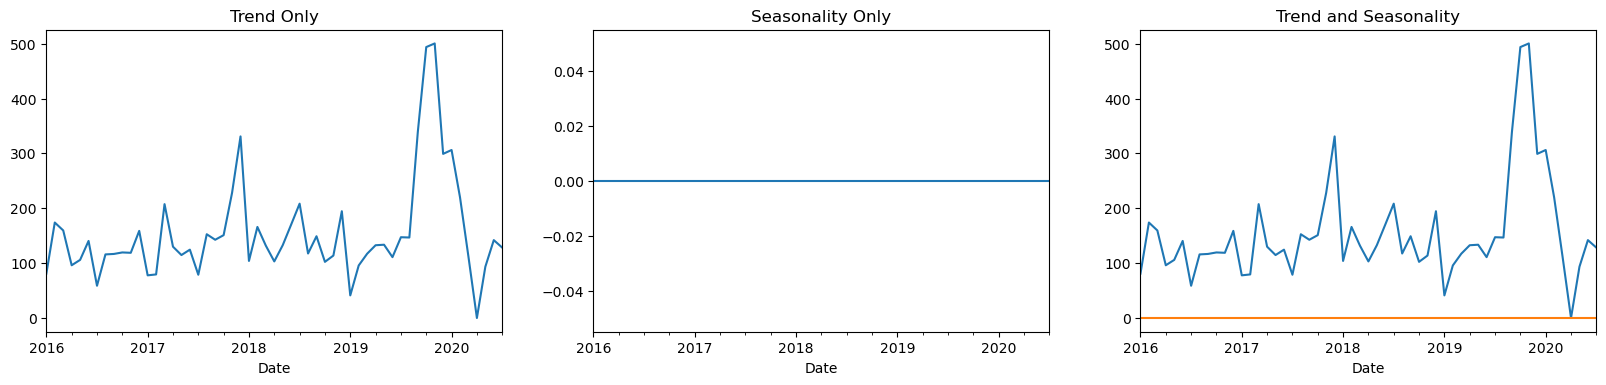

In [13]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)                         
df_reconstructed['trend'].plot(title='Trend Only', legend=False, ax=axes[0])
df_reconstructed['seas'].plot(title='Seasonality Only', legend=False, ax=axes[1])
df_reconstructed[['trend','seas']].plot(title='Trend and Seasonality', legend=False, ax=axes[2])

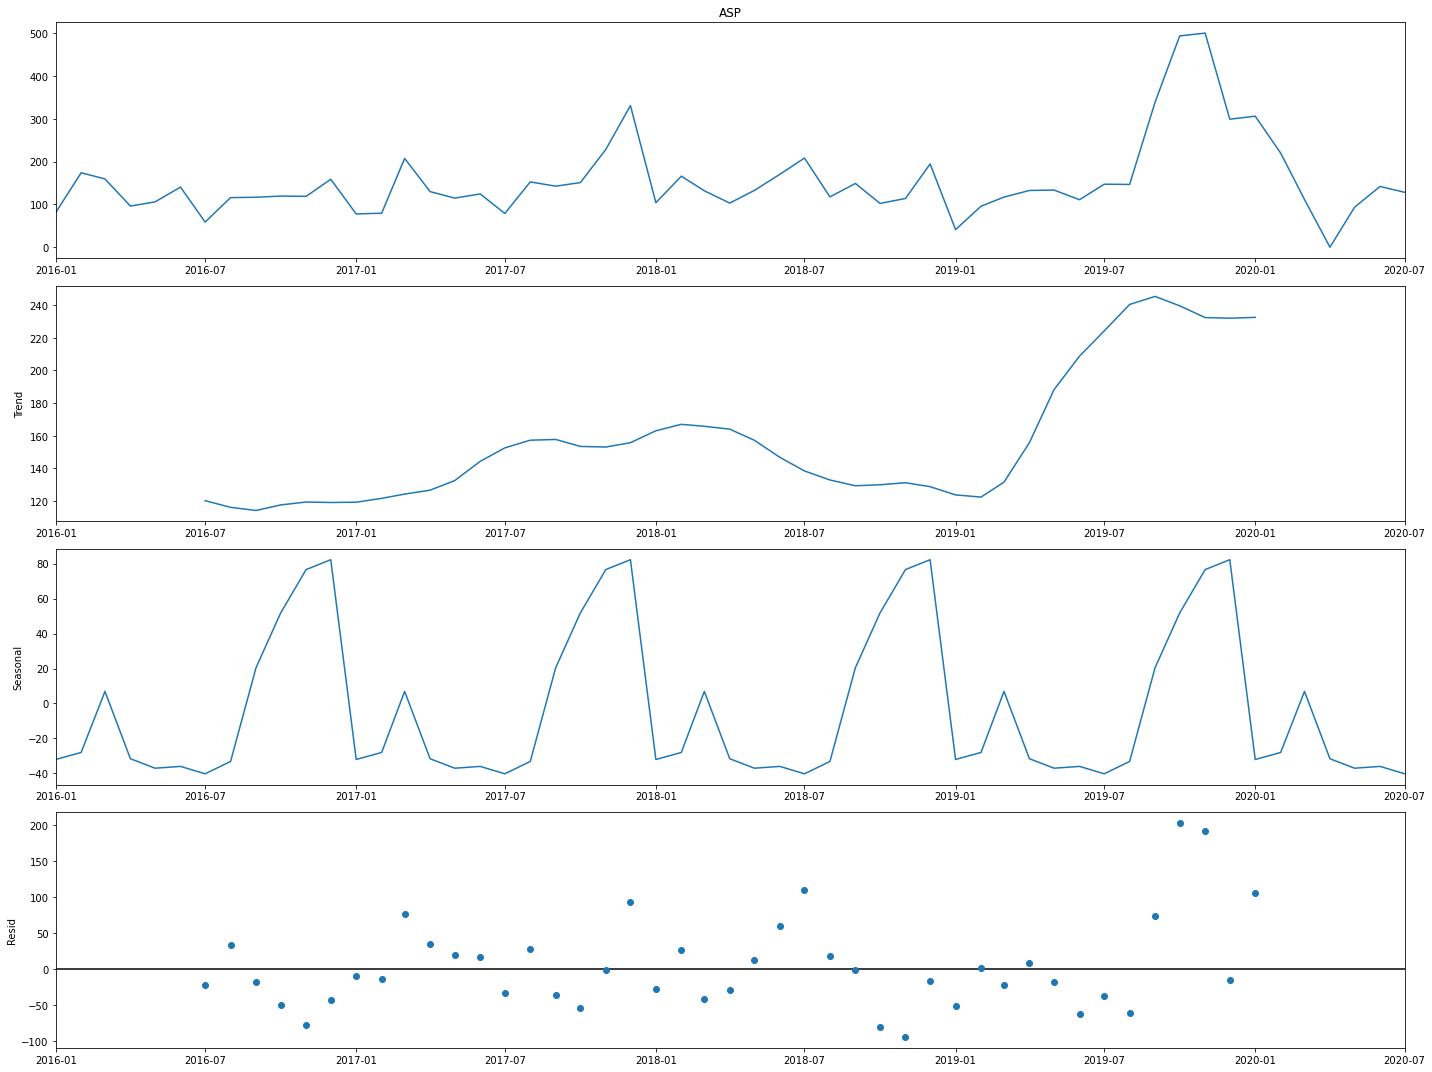

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
# plt.rcParams["lines.linewidth"] = 5
# plt.rcParams["xtick.labelsize"] = 12
# plt.rcParams["ytick.labelsize"] = 10
res = sm.tsa.seasonal_decompose(df.ASP)
res.plot()
plt.show()

In [15]:
df = df[['ASP']]

In [16]:
len(df)

55

# Test - Train Split

In [17]:
train = df[:45]
test = df[44:]

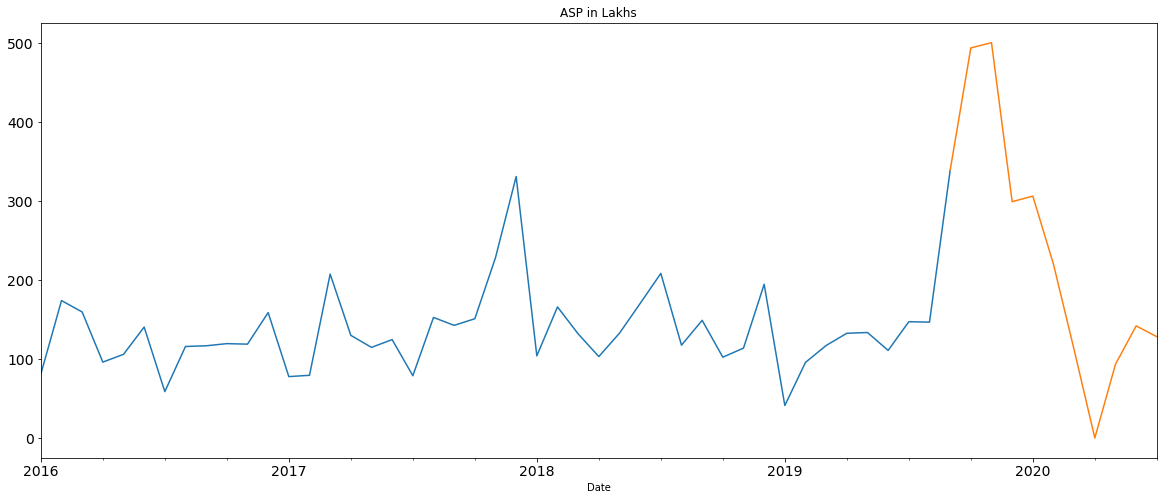

In [18]:
#Plotting data
train.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14)
test.ASP.plot(figsize = (20,8), title = 'ASP in Lakhs', fontsize=14)
plt.show()

# Naive Approach

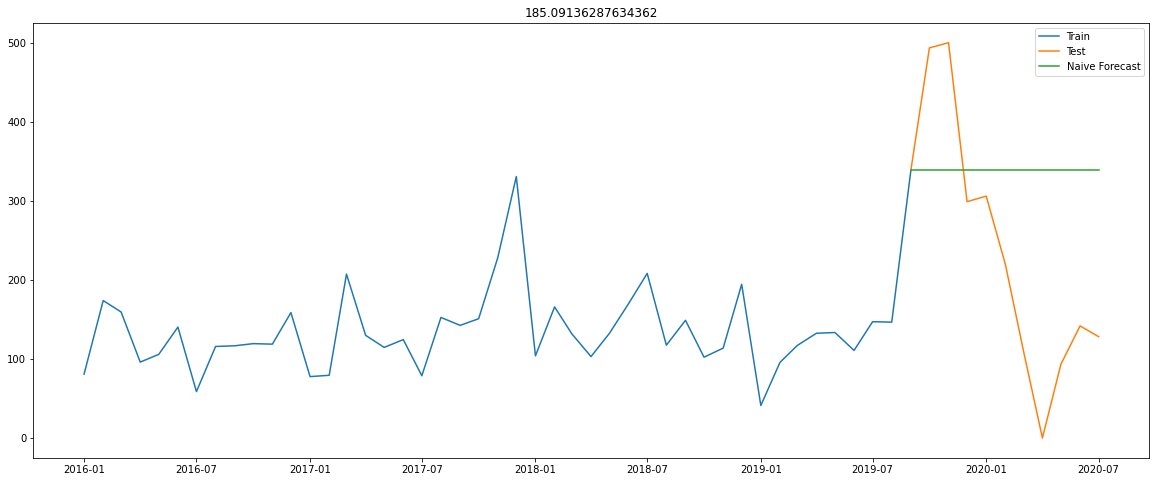

In [19]:
dd = np.asarray(train.ASP)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

rms = sqrt(mean_squared_error(test.ASP, y_hat.naive))
plt.figure(figsize=(20,8))
plt.plot(train.index, train['ASP'], label='Train')
plt.plot(test.index,test['ASP'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Simple Average

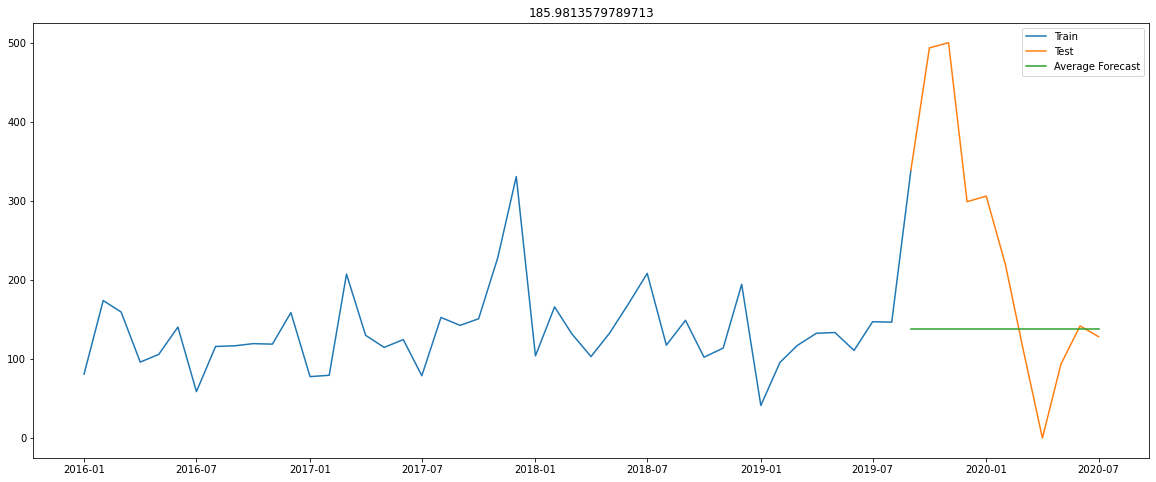

In [20]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['ASP'].mean()
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.avg_forecast))

plt.figure(figsize=(20,8))
plt.plot(train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Moving Average

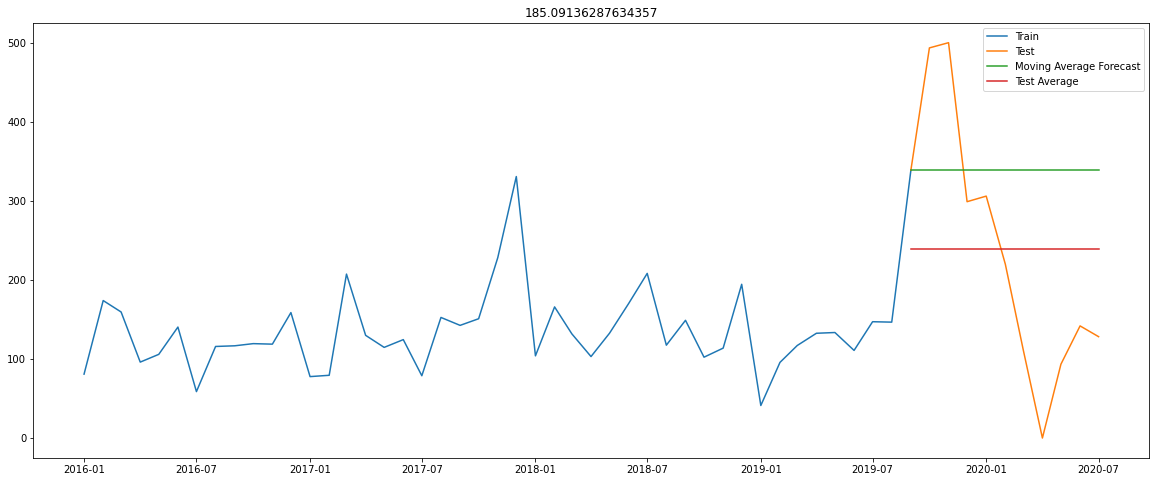

In [21]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['ASP'].rolling(1).mean().iloc[-1]
y_hat_avg['test_avg'] = y_hat_avg['ASP'].mean() 
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.moving_avg_forecast))

plt.figure(figsize=(20,8))
plt.plot(train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.plot(y_hat_avg['test_avg'], label='Test Average')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Simple Exponential Smoothing

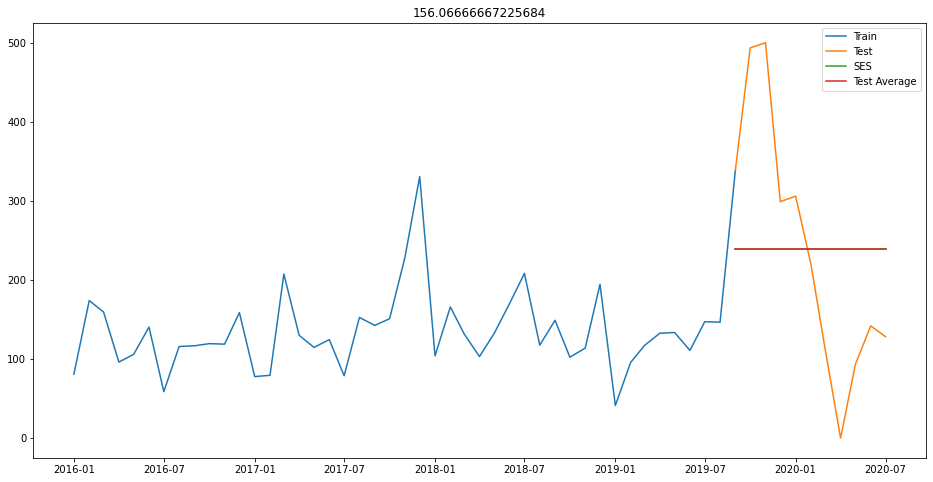

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['ASP'])).fit(smoothing_level=0.5,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
y_hat_avg['test_avg'] = y_hat_avg['ASP'].mean() 
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.SES))
plt.figure(figsize=(16,8))
plt.plot(train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.plot(y_hat_avg['test_avg'], label='Test Average')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Holt’s Linear Trend method

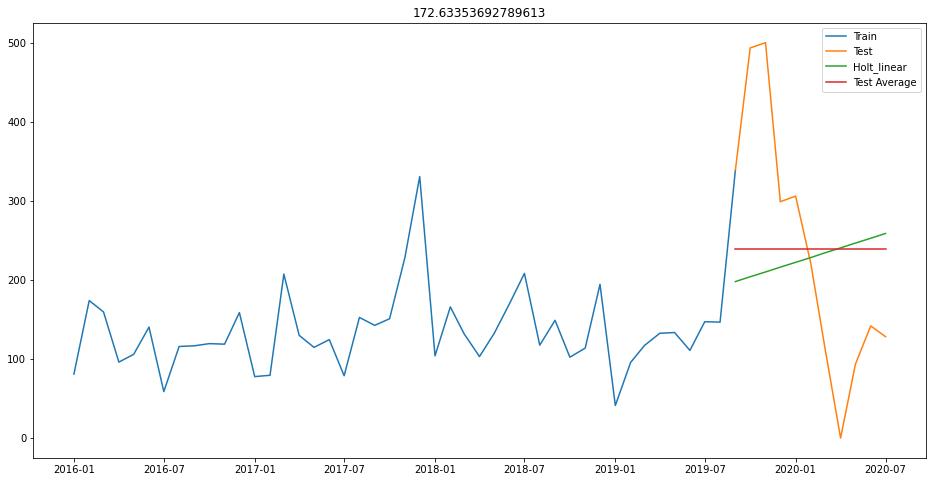

In [23]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['ASP'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
y_hat_avg['test_avg'] = y_hat_avg['ASP'].mean() 
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.Holt_linear))

plt.figure(figsize=(16,8))
plt.plot(train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.plot(y_hat_avg['test_avg'], label='Test Average')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Holt-Winters Method

In [24]:
import warnings
warnings.filterwarnings('ignore')
l = []
x = []
for i in range(2,20):
    y_hat_avg = test.copy()
    fit1 = ExponentialSmoothing(np.asarray(train['ASP']) ,seasonal_periods = i, trend='add', seasonal='add',).fit()
    y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
    rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.Holt_Winter))
    l.append(rms)
    x.append(i)
    
df_holt = pd.DataFrame(x,l).reset_index()
df_holt = df_holt.rename(columns = {'index' : 'rmse', 0 :'seasonal_period'})

In [25]:
df_holt[df_holt.rmse == df_holt.rmse.min()]

,rmse,seasonal_period
10,140.341947,12


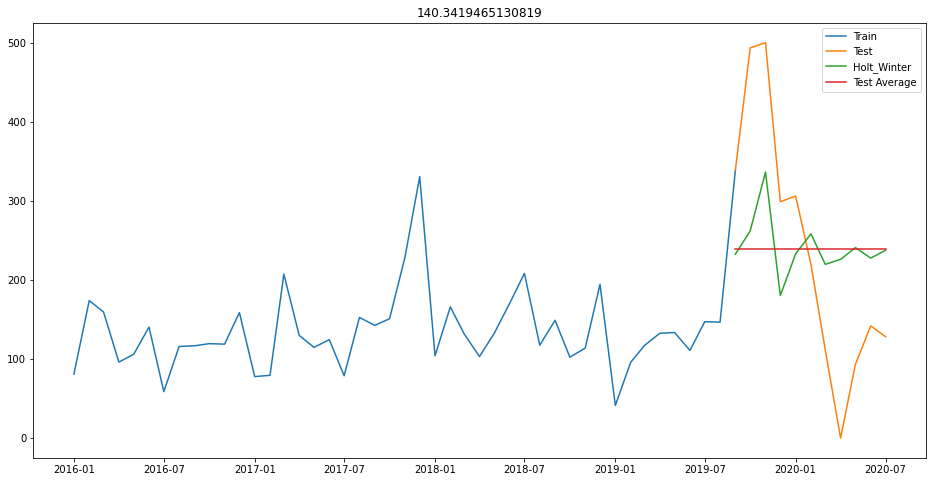

In [26]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['ASP']) ,seasonal_periods=12, trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
y_hat_avg['test_avg'] = y_hat_avg['ASP'].mean()
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.Holt_Winter))

plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.plot(y_hat_avg['test_avg'], label='Test Average')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [27]:
data=df.copy()
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['ASP'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)          
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=511.961, BIC=520.767, Time=0.321 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=533.388, BIC=536.910, Time=0.007 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=510.932, BIC=517.976, Time=0.195 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=515.195, BIC=522.240, Time=0.211 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=534.460, BIC=536.221, Time=0.009 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=513.583, BIC=518.867, Time=0.041 seconds
Fit ARIMA(1,0,0)x(2,1,0,12) [intercept=True]; AIC=512.249, BIC=521.055, Time=0.560 seconds
Fit ARIMA(1,0,0)x(1,1,1,12) [intercept=True]; AIC=512.006, BIC=520.812, Time=0.345 seconds
Fit ARIMA(1,0,0)x(0,1,1,12) [intercept=True]; AIC=510.007, BIC=517.051, Time=0.212 seconds
Fit ARIMA(1,0,0)x(0,1,2,12) [intercept=True]; AIC=512.006, BIC=520.812, Time=0.551 seconds
Fit ARIMA(1,0,0)x(1,1,2,12) [intercept=True]; 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   55
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -251.003
Date:                              Thu, 27 Aug 2020   AIC                            510.007
Time:                                      13:15:17   BIC                            517.051
Sample:                                           0   HQIC                           512.604
                                               - 55                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.1141     10.390      0.781      0.435     -12.249      28.477
ar.L1          0.6020      0.109      5.512      0.000       0.388       0.816
ma.S.L12      -0.6143      0.582     -1.056      0.291      -1.755       0.526
sigma2      5998.8823   2173.046      2.761      0.006    1739.790    1.03e+04
===================================================================================
Ljung-Box (Q):                       27.07   Jarque-Bera (JB):                 6.39
Prob(Q):                              0.94   Prob(JB):                         0.04
Heteroskedasticity (H):               5.43   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

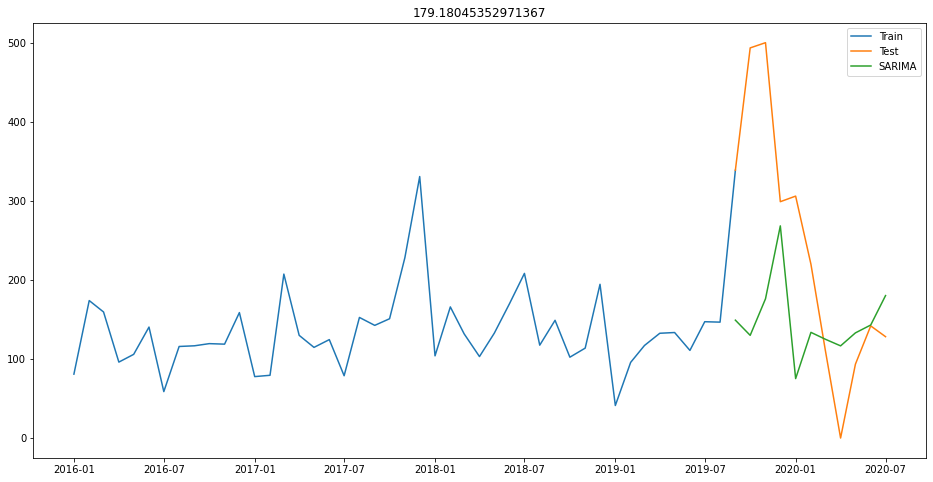

In [28]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.ASP, order=(1, 0, 0),seasonal_order=(1,1,0,12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
rms = sqrt(mean_squared_error(test.ASP, y_hat_avg.SARIMA))

plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Autoregressive Moving Average (ARMA)

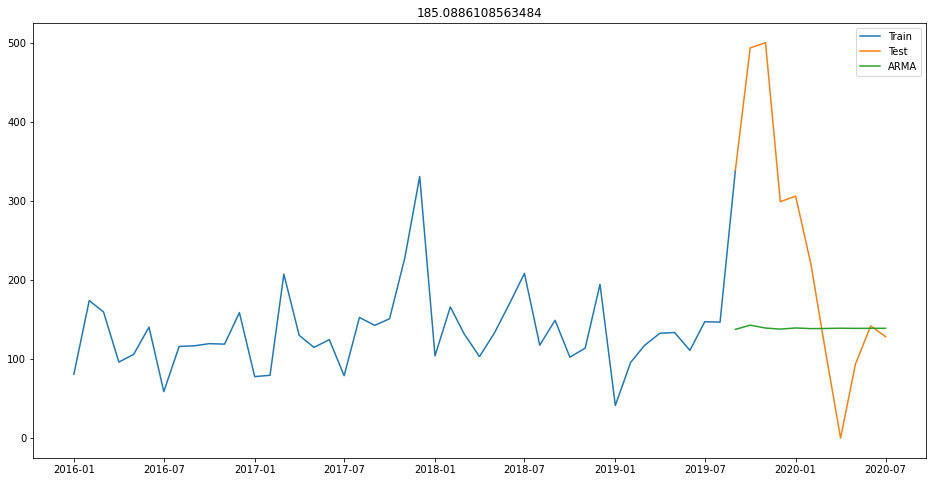

In [32]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train, order=(4, 0)).fit(disp=False)
yhat = model.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
df_ar = pd.DataFrame(yhat).merge(test, left_index=True, right_index=True).rename(columns={0:'Predicted', 'ASP':'Test'})
rms = sqrt(mean_squared_error(df_ar.Test, df_ar.Predicted))
rms
plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(df_ar['Predicted'], label='ARMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()

# Autoregressive Integrated Moving Average (ARIMA)

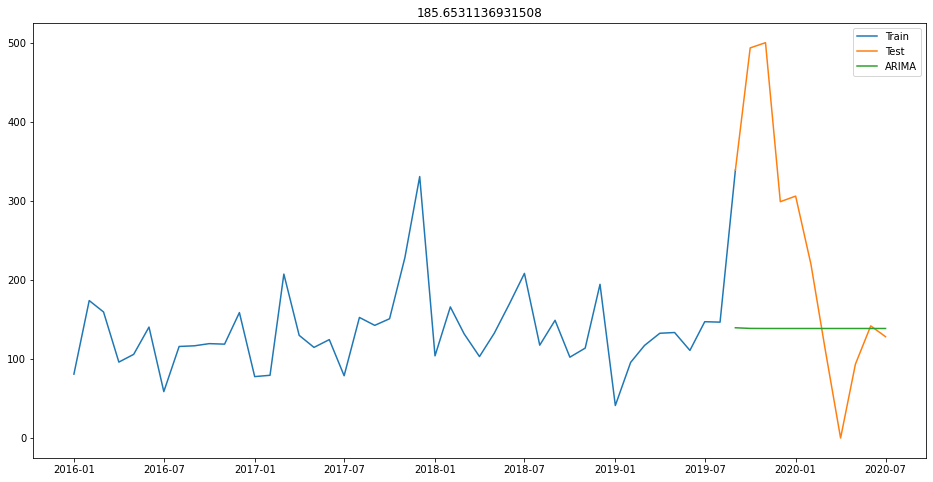

In [33]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1, 0, 0)).fit(disp=False)
yhat = model.predict(start=test.index.min(), end=test.index.max(), dynamic=True)
df_ar = pd.DataFrame(yhat).merge(test, left_index=True, right_index=True).rename(columns={0:'Predicted', 'ASP':'Test'})
rms = sqrt(mean_squared_error(df_ar.Test, df_ar.Predicted))


plt.figure(figsize=(16,8))
plt.plot( train['ASP'], label='Train')
plt.plot(test['ASP'], label='Test')
plt.plot(df_ar['Predicted'], label='ARIMA')
plt.legend(loc='best')
plt.title(rms)
plt.show()